In [1]:
import numpy as np

from itkwidgets import view
import matplotlib.pyplot as plt

import site
site.addsitedir("../src")

from mocoreg import mocoreg

In [2]:
app = mocoreg()
app.read_4d_bmode_matlab_file('../Data/bmenv2.dat')

In [3]:
app.compute_keyframes()

In [4]:
print(app.keyframes)

[0, 44, 77, 95, 104, 116, 125, 134, 146, 164, 173, 182, 191, 199]


In [5]:
import time
start_time = time.perf_counter()
app.register_keyframes(app.keyframes)
end_time = time.perf_counter()

print("Time required for registration (seconds) = ", end_time-start_time)

Registering set 0 of 13


itkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'itkImageF4'
vectoritkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'vectoritkImageF4'


Registering set 1 of 13
Registering set 2 of 13
Registering set 3 of 13
Registering set 4 of 13
Registering set 5 of 13
Registering set 6 of 13
Registering set 7 of 13
Registering set 8 of 13
Registering set 9 of 13
Registering set 10 of 13
Registering set 11 of 13
Registering set 12 of 13
Time required for registration (seconds) =  258.8131777


In [6]:
app.interpolate_keyframe_transforms(app.keyframes)

Interpolating frames 0 to 44
Interpolating frames 44 to 77
Interpolating frames 77 to 95
Interpolating frames 95 to 104
Interpolating frames 104 to 116
Interpolating frames 116 to 125
Interpolating frames 125 to 134
Interpolating frames 134 to 146
Interpolating frames 146 to 164
Interpolating frames 164 to 173
Interpolating frames 173 to 182
Interpolating frames 182 to 191
Interpolating frames 191 to 199


In [7]:
app.apply_interpolations()

In [8]:
tmp = [ list(app.transforms[x].GetParameters()) for x in range(len(app.transforms))]
print(len(tmp), len(app.data_array))
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])

199 200


([<matplotlib.lines.Line2D at 0x238cdaa64c0>],
 [<matplotlib.lines.Line2D at 0x238cdaa6ca0>])

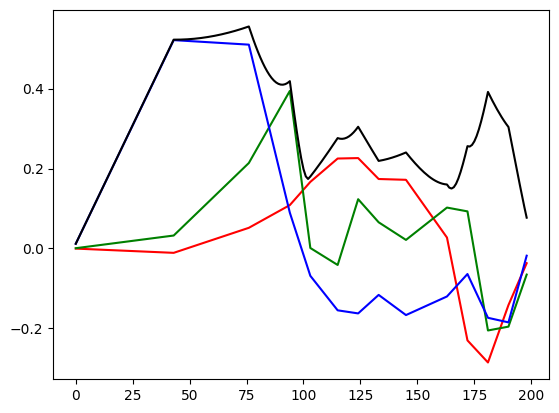

In [9]:
from matplotlib import pyplot as plt

plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt(x*x+y*y+z*z),'k')

In [10]:
meansq, diffs = app.compute_inter_keyframe_diffs()
meansq_reg, diffs_reg = app.compute_inter_keyframe_diffs(data_array=app.data_array_reg)

In [11]:
print(diffs, meansq)
print("")
print(diffs_reg, meansq_reg)

[2380229.4645416015, 2641754.9839937845, 2617189.053316554, 2463182.246847358, 2425685.57949294, 2715719.431941378, 2238280.9513445804, 2882913.376563368, 1517383.2438141657, 2645133.524669029, 2755727.740583964, 1780239.6087897832, 1556095.6999259396, 5060866.169052092] 2744646.2365289647

[2380229.4645416015, 2641754.9839937845, 2617189.053316554, 2463182.246847358, 2425685.57949294, 2715719.431941378, 2238280.9513445804, 2882913.376563368, 1517383.1574338763, 2645133.4255647673, 2755727.740583964, 1780239.6087897832, 1556095.6999259396, 5060866.169052092] 2744646.2222609217


In [12]:
print( np.sum(np.abs(app.data_array[0] - app.data_array[10])))
print( np.sum(np.abs(app.data_array_reg[0] - app.data_array_reg[10])))

2465487092.6283565
2465487092.791213
